# **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import zipfile
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


# **Data Collecting and Precossing**

In [2]:
trainpath = '../input/dogs-vs-cats/train.zip'
testpath = '../input/dogs-vs-cats/test1.zip'
files_path = "/kaggle/files/unzipped/"


with zipfile.ZipFile(trainpath, 'r') as zipp:
    zipp.extractall(files_path)
    
with zipfile.ZipFile(testpath, 'r') as zipp:
    zipp.extractall(files_path)


trainpath = "/kaggle/files/unzipped/train"
testpath = "/kaggle/files/unzipped/test1"


In [3]:
file = os.listdir(trainpath)
print(f'For Training data , found {len(file)} Photos')

For Training data , found 25000 Photos


In [4]:
s=[]
files = gb.glob(pathname= str( trainpath + '/*.jpg'))
for file in files:
    image = plt.imread(file)
    s.append(image.shape)
pd.Series(s).value_counts()

(374, 500, 3)    2955
(375, 499, 3)    2912
(499, 375, 3)     261
(333, 499, 3)     229
(500, 374, 3)     227
                 ... 
(374, 295, 3)       1
(143, 255, 3)       1
(290, 183, 3)       1
(240, 155, 3)       1
(190, 157, 3)       1
Length: 8513, dtype: int64

In [5]:
file = os.listdir(testpath)
print(f'For Training data , found {len(file)} Photos')

For Training data , found 12500 Photos


In [6]:
s=[]
files = gb.glob(pathname= str( testpath + '/*.jpg'))
for file in files:
    image = plt.imread(file)
    s.append(image.shape)
pd.Series(s).value_counts()

(374, 500, 3)    1529
(375, 499, 3)    1522
(499, 375, 3)     133
(500, 374, 3)     123
(332, 500, 3)     113
                 ... 
(489, 270, 3)       1
(269, 265, 3)       1
(440, 359, 3)       1
(447, 335, 3)       1
(426, 500, 3)       1
Length: 4888, dtype: int64

In [7]:
size=180

In [8]:
X_train = []
Y_train = []
X_Title=[]

files = gb.glob(pathname= str( trainpath + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (size,size))
    X_train.append(list(image_array))
    file=file.split('/')[-1]
    sep=file.split('.')[0]
    X_Title.append(sep)
    if(sep=='dog'):
        Y_train.append(1)
    else:
        Y_train.append(0)
        
    

In [9]:
X_test = []

files = gb.glob(pathname= str( testpath + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (size,size))
    X_test.append(list(image_array))



In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {Y_train.shape}')


X_train shape  is (25000, 180, 180, 3)
X_test shape  is (12500, 180, 180, 3)
y_train shape  is (25000,)


In [11]:
print('Size OF Image = ',np.array(X_train[5]).shape)


Size OF Image =  (180, 180, 3)


# **Training Data Shuffle and Split**

In [12]:
X_train, Y_train= shuffle(X_train, Y_train, random_state=True)        


In [13]:
Y_train = tf.one_hot(Y_train, 2)


2022-09-10 02:07:47.749961: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-10 02:07:47.894690: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-10 02:07:47.895485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-10 02:07:47.900005: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [14]:
X_Train=X_train[:20000]
Y_Train=Y_train[:20000]
X_val=X_train[20000:]
y_val=Y_train[20000:]


In [15]:
X_Title=np.array(X_Title)


##### **Number of Dogs is equal to Number of Cats in Training Data**

<AxesSubplot:>

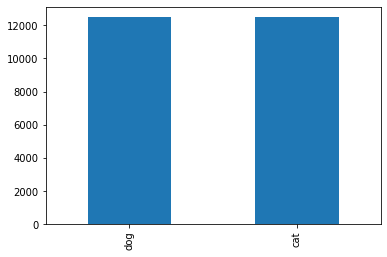

In [16]:
pd.Series(X_Title).value_counts().plot.bar()

# **Callbacks:**

In [17]:
Earlystop = EarlyStopping(patience=10)


In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            lr=0.0001,
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [19]:
callbacks = [Earlystop, learning_rate_reduction]

# **Data Augmentation**

# **CNN Model**

In [20]:
 


data_augmentation_layer = keras.Sequential([                                    
  keras.layers.RandomFlip('horizontal',input_shape=(size, size, 3)),
  keras.layers.RandomRotation(0.15),
  keras.layers.RandomZoom(0.2),
  keras.layers.RandomWidth(0.1),
  keras.layers.RandomHeight(0.1),
], name='data_augmentation')

model = keras.Sequential([
data_augmentation_layer,
    
keras.layers.Conv2D(filters=16,kernel_size = (3, 3),strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),
    
keras.layers.Conv2D(filters=32,kernel_size = (3, 3),strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),    
keras.layers.BatchNormalization(),
    
keras.layers.Conv2D(filters=64,kernel_size = (3, 3),strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),    
    
keras.layers.Conv2D(filters=128,kernel_size =(3, 3), strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),
  
keras.layers.Conv2D(filters=256,kernel_size =(3, 3), strides=1),
keras.layers.Activation(activation='relu'),
   
keras.layers.GlobalMaxPool2D(),   

keras.layers.Dense(256,activation='relu') ,

keras.layers.BatchNormalization(),
keras.layers.Dense(128,activation='relu') ,
    

keras.layers.Dense(64,activation='relu') ,
    
keras.layers.Dense(32,activation='relu') ,
keras.layers.Dense(16,activation='relu') ,
    
keras.layers.Dense(units=2,activation='softmax') ])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 16)    448       
_________________________________________________________________
activation (Activation)      (None, None, None, 16)    0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 16)    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    4640      
_________________________________________________________________
activation_1 (Activation)    (None, None, None, 32)    0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 32)    0

# **Train and lets see the accuracy rate our Model**

In [21]:
epochs = 75

ThisModel = model.fit(X_Train, Y_Train, epochs=epochs,batch_size=32,verbose=1,callbacks=callbacks, validation_data=(X_val, y_val))

2022-09-10 02:07:51.382697: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1944000000 exceeds 10% of free system memory.
2022-09-10 02:07:53.684436: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1944000000 exceeds 10% of free system memory.
2022-09-10 02:07:55.399984: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/75


2022-09-10 02:07:58.150205: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


624/625 [============================>.] - ETA: 0s - loss: 0.6593 - accuracy: 0.6125

2022-09-10 02:08:47.789848: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 486000000 exceeds 10% of free system memory.
2022-09-10 02:08:48.021658: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 486000000 exceeds 10% of free system memory.


625/625 [==============================] - 54s 73ms/step - loss: 0.6593 - accuracy: 0.6125 - val_loss: 0.6225 - val_accuracy: 0.6540
Epoch 2/75
625/625 [==============================] - 26s 41ms/step - loss: 0.5653 - accuracy: 0.7096 - val_loss: 0.5769 - val_accuracy: 0.7208
Epoch 3/75
625/625 [==============================] - 19s 31ms/step - loss: 0.4904 - accuracy: 0.7648 - val_loss: 0.4165 - val_accuracy: 0.8022
Epoch 4/75
625/625 [==============================] - 15s 24ms/step - loss: 0.4300 - accuracy: 0.7965 - val_loss: 0.4247 - val_accuracy: 0.7836
Epoch 5/75
625/625 [==============================] - 14s 23ms/step - loss: 0.3908 - accuracy: 0.8245 - val_loss: 0.4292 - val_accuracy: 0.8358
Epoch 6/75
625/625 [==============================] - 12s 19ms/step - loss: 0.3586 - accuracy: 0.8397 - val_loss: 0.4085 - val_accuracy: 0.8178
Epoch 7/75
625/625 [==============================] - 11s 18ms/step - loss: 0.3378 - accuracy: 0.8510 - val_loss: 0.3168 - val_accuracy: 0.8636
Epo

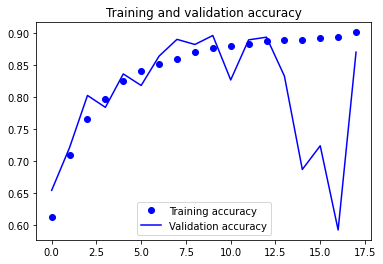

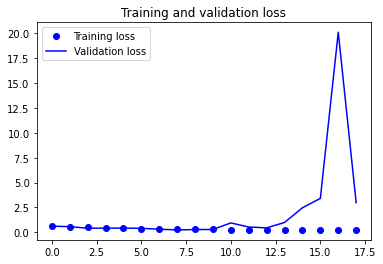

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = ThisModel.history['accuracy']
val_accuracy = ThisModel.history['val_accuracy']
loss = ThisModel.history['loss']
val_loss = ThisModel.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Prediction**

In [23]:
y_result = model.predict(X_test)

print('Prediction Shape is {}'.format(y_result.shape))

2022-09-10 02:13:20.394283: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1215000000 exceeds 10% of free system memory.


Prediction Shape is (12500, 2)


In [24]:
def get_code(n):
    if n == 1:
        return 'Dog'
    else:
        return 'Cat'

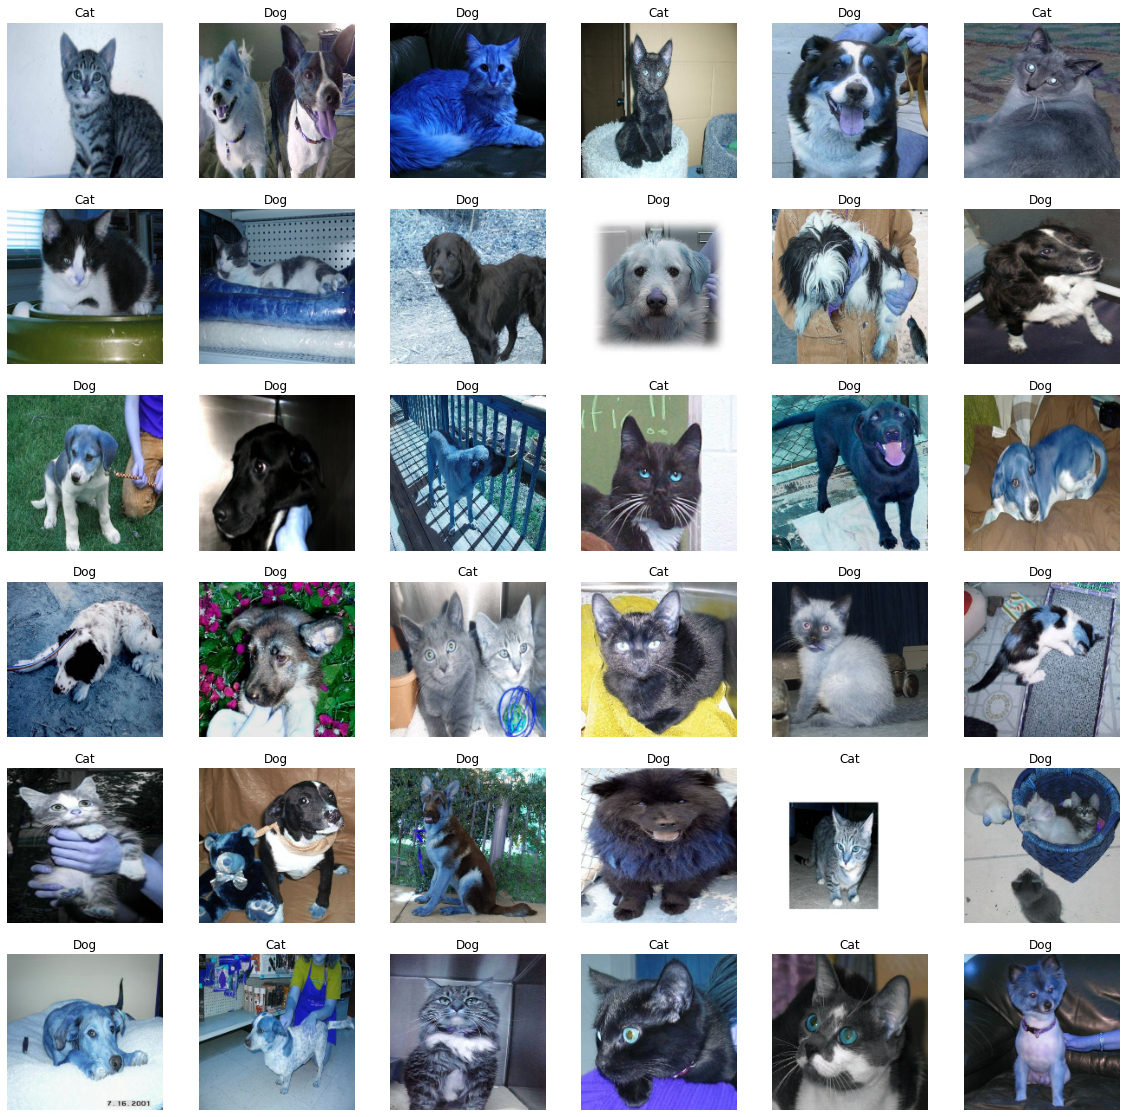

In [25]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(array_to_img(X_test[i]))     
    plt.axis('off')
    plt.title(get_code(np.argmax(y_result[i])))

In [26]:
Y=np.argmax(y_result, axis=-1)

In [27]:
pd.read_csv('../input/dogs-vs-cats/sampleSubmission.csv')


,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,0
12498,12499,0


In [28]:
submission_result = pd.DataFrame(
    {
        'id':np.arange(1,len(Y)+1),
        'label':Y
    }
)

In [29]:
submission_result


,id,label
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
12495,12496,0
12496,12497,1
12497,12498,1
12498,12499,0
